<a href="https://colab.research.google.com/github/Mahima-2111/Play-Store-App-Review-Analysis/blob/main/Mahima_Shree_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
play_store = pd.read_csv("/content/drive/MyDrive/Capstone_Project-1/Play Store Data.csv")
user_review = pd.read_csv("/content/drive/MyDrive/Capstone_Project-1/User Reviews.csv")

# Lets Explore the Two DataFrames

In [ ]:
# Lets Print the Shape of the Two DataFrames

print(f"The shape of PlayStore_df is {play_store.shape}")
print(f"The shape of UserReview_df is {user_review.shape}")

The shape of PlayStore_df is (10841, 13)
The shape of UserReview_df is (64295, 5)


In [ ]:
# Print the columns of two DataFrames

print(play_store.columns)
print(user_review.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [ ]:
# filling the space between the column names with "_" for ease of use in the Play_Store DF.

play_store.columns = play_store.columns.str.replace(" ","_")
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

## 1. Lets Explore PlayStore DataFrame

In [ ]:
rows = play_store.shape[0]
column = play_store.shape[1]
print(f'There are {rows} Rows and {column} Columns in the PlayStore DataFrame')

There are 10841 Rows and 13 Columns in the PlayStore DataFrame


In [ ]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Lets see the 1st and last 10 rows of information of the dataframe.

concat_PS = pd.concat([play_store.head(10),play_store.tail(10)])
concat_PS

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [ ]:
def PSinfo():
    temp = pd.DataFrame(index=play_store.columns)
    temp['data_type'] = play_store.dtypes
    temp["count of non null values"] = play_store.count()
    temp['NaN values'] = play_store.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(play_store)).round(4)*100 # or play_store.isnull().mean()
    temp['unique_count'] = play_store.nunique()
    return temp 
PSinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,10841,0,0.00,9660
Category,object,10841,0,0.00,34
Rating,float64,9367,1474,13.60,40
Reviews,object,10841,0,0.00,6002
Size,object,10841,0,0.00,462
Installs,object,10841,0,0.00,22
Type,object,10840,1,0.01,3
Price,object,10841,0,0.00,93
Content_Rating,object,10840,1,0.01,6
Genres,object,10841,0,0.00,120


## 1. Lets Explore UserReview DataFrame

In [ ]:
rows = user_review.shape[0]
column = user_review.shape[1]
print(f'There are {rows} Rows and {column} Columns in the User_Review DataFrame')

There are 64295 Rows and 5 Columns in the User_Review DataFrame


In [ ]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Lets see the 1st and last 10 rows of information of the dataframe.

concat_UR  = pd.concat([user_review.head(10),user_review.tail(10)])
concat_UR

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [ ]:
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
def URinfo():
    temp = pd.DataFrame(index=user_review.columns)
    temp['data_type'] = user_review.dtypes
    temp["count of non null values"] = user_review.count()
    temp['NaN values'] = user_review.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(user_review)).round(4)*100 # or user_review.isnull().mean()
    temp['unique_count'] = user_review.nunique()
    return temp 
URinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,6195
Sentiment_Subjectivity,float64,37432,26863,41.78,4530


# DATA CLEANING

## Lets Work on Missing Values

### Missing Values in UserReview DF

In [ ]:
URinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,6195
Sentiment_Subjectivity,float64,37432,26863,41.78,4530


In [ ]:
# creating new_UR DF

new_UR = user_review.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"],how="all")

In [ ]:
new_UR.shape

(37432, 5)

In [ ]:
new_UR.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
new_UR[new_UR.Translated_Review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [ ]:
new_UR = new_UR.dropna(subset= ["Translated_Review"],how = "all")
new_UR.shape

(37427, 5)

In [ ]:
def New_URinfo():
    temp = pd.DataFrame(index=new_UR.columns)
    temp['data_type'] = new_UR.dtypes
    temp["count of non null values"] = new_UR.count()
    temp['NaN values'] = new_UR.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(new_UR)).round(4)*100 # or new_UR.isnull().mean()
    temp['unique_count'] = new_UR.nunique()
    return temp 
New_URinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,37427,0,0.0,865
Translated_Review,object,37427,0,0.0,27994
Sentiment,object,37427,0,0.0,3
Sentiment_Polarity,float64,37427,0,0.0,6195
Sentiment_Subjectivity,float64,37427,0,0.0,4530


***CONCLUSION:*** From the above output we can infer that we have removed all the NaN values from the User Review DF

### Missing Values in PlayStore DF

In [ ]:
# If any columns have 90% ofthe data missing then we can drop that column.

print(len(play_store)*0.9) # 90% of data will be 9756
play_store.isnull().sum()

# From the below output we can infer that no columns has 9756 NaN values 
# so we need not to Drop any Columns in this DataFrame.

9756.9


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

From the above Output we can see that we have missing values in 5 columns namely [Rating,Type,Content_Rating,Current_Ver,Android_Ver]

In [ ]:
# Lets check whether we have NAN values in all of the 5 columns which has NaN in each row. 

play_store.dropna(subset=["Rating","Type","Content_Rating","Current_Ver","Android_Ver"],how="all").shape

# since the shape of the output remains as original that means we dont have any rows where all of this values are NAN.

(10841, 13)

***Rating Column***

In [ ]:
PSinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,10841,0,0.00,9660
Category,object,10841,0,0.00,34
Rating,float64,9367,1474,13.60,40
Reviews,object,10841,0,0.00,6002
Size,object,10841,0,0.00,462
Installs,object,10841,0,0.00,22
Type,object,10840,1,0.01,3
Price,object,10841,0,0.00,93
Content_Rating,object,10840,1,0.01,6
Genres,object,10841,0,0.00,120


From the above information we can see that 13.6% of data are missing in the Rating Column.

In [ ]:
play_store[play_store["Rating"].isnull()].shape

(1474, 13)

***Our Hypothesis:***

We cant simply drop these NaN values of Rating Column.
So inorder to get sentiment or Translated review info for the Apps from the User Review DF so that we can Fill these NaN values based on Reviews. 
So In order to do so we need to merge these two DF's so that we get Common Apps between between them and can compare. 

#### Lets Merge Two DataFrames based on common "App" Column.

In [ ]:
# Lets Merge two DataFrame to check the common apps 
ps_copy = play_store.copy()
ur_copy = new_UR.copy()

In [ ]:
merged_PS_UR = pd.merge(ps_copy, ur_copy, how='inner', left_on='App', right_on='App')

In [ ]:
def Mergedinfo():
    temp = pd.DataFrame(index=merged_PS_UR.columns)
    temp['data_type'] = merged_PS_UR.dtypes
    temp["count of non null values"] = merged_PS_UR.count()
    temp['NaN values'] = merged_PS_UR.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(merged_PS_UR)).round(4)*100 # or merged_PS_UR.isnull().mean()
    temp['unique_count'] = merged_PS_UR.nunique()
    return temp 
Mergedinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,72605,0,0.00,816
Category,object,72605,0,0.00,33
Rating,float64,72566,39,0.05,22
Reviews,object,72605,0,0.00,1068
Size,object,72605,0,0.00,168
Installs,object,72605,0,0.00,12
Type,object,72605,0,0.00,2
Price,object,72605,0,0.00,9
Content_Rating,object,72605,0,0.00,5
Genres,object,72605,0,0.00,68


From the Above info we can infer that we have 39 missing values in Rating Column

In [ ]:
print(play_store.App.nunique())
print(new_UR.App.nunique())
print(Mergedinfo()["unique_count"]["App"])

9660
865
816


From the Above output we can see that we have 9660 unique Apps in Playstore DF.865 unique Apps in UserReview DF.

From the Merged DF we can infer that ....we have 816 Common Apps between Two DF's.


In [ ]:
merged_PS_UR[merged_PS_UR.Rating.isnull()] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
47874,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Have used years great success. Easy & fast. Lo...,Positive,0.488889,0.563889
47875,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,I like shows blood pressure good level also hi...,Positive,0.286667,0.480000
47876,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Really helps track pressure allows write note ...,Positive,0.100000,0.300000
47877,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,The best Blood Pressure Android...... My Docto...,Positive,1.000000,0.650000
47878,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Very helpful many useful features. Particularl...,Positive,0.291667,0.283333
47879,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Doesn't work.,Neutral,0.000000,0.000000
47880,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Just 3 weeks far happy..,Positive,0.450000,1.000000
47881,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Great tracking blood pressure readings. Love e...,Positive,0.650000,0.675000
47882,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Nice UI. Easy enter data.,Positive,0.516667,0.916667
47883,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up,Easy helpful,Positive,0.433333,0.833333


In [ ]:
l = len(merged_PS_UR[merged_PS_UR.Rating.isnull()]) # 39
l1 = len(merged_PS_UR[(merged_PS_UR.Rating.isnull()) & (merged_PS_UR["Sentiment"].str.contains("Positive"))]) # 31
l2 = len(merged_PS_UR[(merged_PS_UR.Rating.isnull()) & (merged_PS_UR["Sentiment"].str.contains("Negative"))]) # 4
l3 = len(merged_PS_UR[(merged_PS_UR.Rating.isnull()) & (merged_PS_UR["Sentiment"].str.contains("Neutral"))]) # 4

positive_per = (l1/l)*100
negative_per = (l2/l)*100
Neutral_per = (l3/l)*100

print(positive_per,negative_per,Neutral_per)

79.48717948717949 10.256410256410255 10.256410256410255


In [ ]:
merged_PS_UR.Sentiment.unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

From the above output we can infer that the App for which Rating are NaN is "Blood Pressure" and rest of the values are also same out of which Sentiment column has - 10% of negative and 10% are neutral 80% are positive values for the App "Blood Pressure"

#### lets now check the rating NaN values in playstore DF

In [ ]:
play_store[play_store["Rating"].isnull() & play_store["Category"].str.contains("MEDICAL") & play_store["App"].str.contains("Blood Pressure")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2356,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up
2502,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up
2513,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up
6598,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up


In [ ]:
mode_value = play_store.Rating.mode()[0]
mode_value

4.4

Since in the Merged DF , the Sentiment column has - 10% of negative and 10% are neutral 80% are positive values for the App "Blood Pressure"
Hence since we have 80% of positive reviews for "Blood Pressure App" we can fill the NaN of rating with mode value "4.4"

In [ ]:
play_store.loc[2513] = play_store.loc[2513].fillna(mode_value)

In [ ]:
play_store.iloc[2513]

App               Blood Pressure
Category                 MEDICAL
Rating                       4.4
Reviews                       10
Size                        2.4M
Installs                  1,000+
Type                        Free
Price                          0
Content_Rating          Everyone
Genres                   Medical
Last_Updated      March 14, 2015
Current_Ver                  1.0
Android_Ver           2.3 and up
Name: 2513, dtype: object

In [ ]:
# This is just for confirmation after filling one NaN Rating. 

print(f'The shape of Play_Store DF having NaN Ratings are : {play_store[play_store["Rating"].isnull()].shape}')
play_store[play_store["Rating"].isnull() & play_store["Category"].str.contains("MEDICAL") & play_store["App"].str.contains("Blood Pressure")]

The shape of Play_Store DF having NaN Ratings are : (1473, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2356,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up
2502,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up
6598,Free Blood Pressure,MEDICAL,NaN,7,5.7M,"5,000+",Free,0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up


From the above output we can infer that we have only 2513 row is common between two DF's. 

***Hypothesis 1 Conclusion is :*** we dont have infomation of sentiment of the Apps to fill the NaN values in the merged DF.

**Hypothesis 2:** Lets check whether do we have rating of Apps within the PlayStore DF.

In [ ]:
# Unique Categories in the filtered DF where the ratings are null.

play_store[play_store["Rating"].isnull()]["Category"].unique()

array(['ART_AND_DESIGN', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS',
       'COMICS', 'DATING', 'EDUCATION', 'EVENTS', 'FOOD_AND_DRINK',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'FAMILY', 'MEDICAL',
       'TOOLS', 'PARENTING', 'VIDEO_PLAYERS', 'PERSONALIZATION', 'GAME',
       'PHOTOGRAPHY', 'SOCIAL', 'SPORTS', 'COMMUNICATION', 'PRODUCTIVITY',
       'AUTO_AND_VEHICLES', 'FINANCE', 'LIFESTYLE', 'TRAVEL_AND_LOCAL',
       'SHOPPING', 'HEALTH_AND_FITNESS', 'WEATHER', 'NEWS_AND_MAGAZINES',
       'MAPS_AND_NAVIGATION'], dtype=object)

In [ ]:
play_store.groupby(["Category"])["App"].nunique()

Category
1.9                       1
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           316
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1909
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    960
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 396
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  327
TOOLS                   829
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           164
WEATHER                  79
Name: App, dtype: int64

From the Above we can see that number of unique Apps found in each category.

**Note:** Ignore the 1.9 category name as of now.

In [ ]:
play_store.groupby(["Category"])["App"].count()

Category
1.9                       1
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

From the Above we can see that number of total Apps found in each category.

**Note:** Ignore the 1.9 category name as of now.

In [ ]:
play_store[(play_store["Category"]== "AUTO_AND_VEHICLES") & (play_store["App"].str.contains("FORD V SERIES CALC - NO LIMIT"))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4697,FORD V SERIES CALC - NO LIMIT,AUTO_AND_VEHICLES,NaN,2,17M,50+,Paid,$9.99,Everyone,Auto & Vehicles,"June 25, 2018",3.0.0,4.0 and up


If we compare the count of Apps and Unique count of Apps above we can get an idea that ....the count and unique count are almost equal in each category.

***Hypothesis 2 Conclusion: *** From this we can say that... even with this hypothesis we dont get information needed to fill NaN of the Rating.

***Hence forth since our Both Hypothesis did not get us the information about Filling NaN of Rating. We are dropping the NaN values of the Rating.***

In [ ]:
new_PS = play_store.dropna(subset = ["Rating"],how= "all")

In [ ]:
new_PS.shape

(9368, 13)

###lets Check for any noises or Irrelevant Data in any of the Columns/Rows. 

we saw Noise in the Category column, so lets check for any noises in the columns

In [ ]:
new_PS['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
# '1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.
new_PS[new_PS['Category']== "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


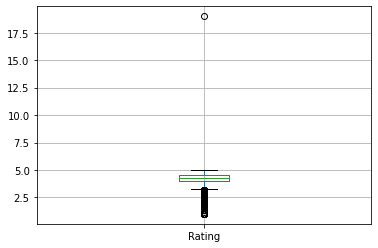

In [ ]:
new_PS.boxplot()

From the above Output we can infer that in the rating column we have one outlier.

since we have only rating as numeric, the boxplot is taking rating column.

In [ ]:
new_PS['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
# Working on Outlier found above.["19.0"]
new_PS[new_PS.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
new_PS[new_PS['Content_Rating'].isnull()] 
new_PS['Last_Updated'].unique() # output has "1.0.19" in it.
new_PS['Type'].unique() # output = array(['Free', 'Paid', nan, '0'], dtype=object)10472 row has that 0 
new_PS["Genres"].unique() # output has "February 11, 2018" in it.

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

if we see the 10472 row and Last updated column we can see that it has different format compare to rest of the values, Type column has 0,Genres has date (noise),Android Ver has NaN value in the 10472 row.

**After analysing the all the above columns we came to conclusion:**we have all the noise values in the 10472 row hence it has to dropped from the DataFrame.


In [ ]:
new_PS = new_PS.drop([10472]) 

In [ ]:
new_PS.shape # 10472 has dropped

(9367, 13)

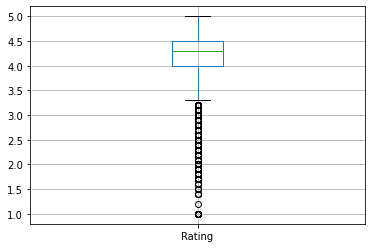

In [ ]:
new_PS.boxplot()

In [ ]:
def PSinfo2():
    temp = pd.DataFrame(index=new_PS.columns)
    temp['data_type'] = new_PS.dtypes
    temp["count of non null values"] = new_PS.count()
    temp['NaN values'] = new_PS.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(new_PS)).round(4)*100 # or new_PS.isnull().mean()
    temp['unique_count'] = new_PS.nunique()
    return temp 
PSinfo2()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,9367,0,0.00,8196
Category,object,9367,0,0.00,33
Rating,float64,9367,0,0.00,39
Reviews,object,9367,0,0.00,5992
Size,object,9367,0,0.00,414
Installs,object,9367,0,0.00,19
Type,object,9367,0,0.00,2
Price,object,9367,0,0.00,73
Content_Rating,object,9367,0,0.00,6
Genres,object,9367,0,0.00,115


*The percentage of null values in the Current_Ver,Android_Ver in the PlayStore_df are very less, it doesnt make much impact on the Df.*
Hence lets Drop those.

In [ ]:
new_PS = new_PS.dropna(subset= ["Current_Ver","Android_Ver"],how = "any")
new_PS.shape

(9361, 13)

In [ ]:
print(new_PS.shape)
new_PS.isnull().sum()

(9361, 13)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

***CONCLUSION:*** From the above output we can infer that we have removed all the NaN values from the Play_Store DF

#### Lets Check for any on Duplicates in the PlayStore DF

In [ ]:
cleaned_PS = new_PS.copy()

In [ ]:
cleaned_PS.shape

(9361, 13)

In [ ]:
cleaned_PS.duplicated().sum()

474

In [ ]:
cleaned_PS.groupby(cleaned_PS.duplicated()).count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
False,8887,8887,8887,8887,8887,8887,8887,8887,8887,8887,8887,8887,8887
True,474,474,474,474,474,474,474,474,474,474,474,474,474


In [ ]:
cleaned_PS.loc[cleaned_PS.duplicated(),:] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [ ]:
cleaned_PS[cleaned_PS["App"]=="Quick PDF Scanner + OCR FREE"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


In [ ]:
cleaned_PS = cleaned_PS.drop_duplicates()

In [ ]:
cleaned_PS.shape

(8887, 13)

In [ ]:
cleaned_PS.duplicated(subset= ["App","Category","Rating","Size","Installs","Type","Price","Content_Rating","Genres","Last_Updated","Current_Ver","Android_Ver"]).sum()

575

In [ ]:
cleaned_PS = cleaned_PS.drop_duplicates(subset= ["App","Category","Rating","Size","Installs","Type","Price","Content_Rating","Genres","Last_Updated","Current_Ver","Android_Ver"])

In [ ]:
cleaned_PS.shape

(8312, 13)

In [ ]:
cleaned_PS[cleaned_PS.duplicated(subset=["App"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
436,Call Blocker,COMMUNICATION,4.1,17529,10M,"1,000,000+",Free,0,Everyone,Communication,"July 26, 2018",5.86,4.0.3 and up
1973,Solitaire,GAME,4.7,154264,12M,"10,000,000+",Free,0,Everyone,Card,"June 8, 2018",Varies with device,Varies with device
2010,Word Search,GAME,4.2,344585,Varies with device,"50,000,000+",Free,0,Everyone,Word,"July 2, 2018",Varies with device,Varies with device
2014,YouTube Kids,FAMILY,4.5,470694,Varies with device,"50,000,000+",Free,0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
2015,Candy Bomb,FAMILY,4.4,42145,20M,"10,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",2.9.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,"100,000,000+",Free,0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25M,"10,000,000+",Free,0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,Varies with device,"50,000,000+",Free,0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [ ]:
cleaned_PS[cleaned_PS["App"]=="Solitaire"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1656,Solitaire,GAME,4.7,254258,23M,"10,000,000+",Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1973,Solitaire,GAME,4.7,154264,12M,"10,000,000+",Free,0,Everyone,Card,"June 8, 2018",Varies with device,Varies with device
2024,Solitaire,FAMILY,4.4,685,26M,"100,000+",Free,0,Everyone,Card;Brain Games,"July 16, 2018",1.7.101,4.1 and up


In [ ]:
def cleaned_PSinfo():
    temp = pd.DataFrame(index=cleaned_PS.columns)
    temp['data_type'] = cleaned_PS.dtypes
    temp["count of non null values"] = cleaned_PS.count()
    temp['NaN values'] = cleaned_PS.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(cleaned_PS)).round(4)*100 # or cleaned_PS.isnull().mean()
    temp['unique_count'] = cleaned_PS.nunique()
    return temp 
cleaned_PSinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,8312,0,0.0,8190
Category,object,8312,0,0.0,33
Rating,float64,8312,0,0.0,39
Reviews,object,8312,0,0.0,5428
Size,object,8312,0,0.0,413
Installs,object,8312,0,0.0,19
Type,object,8312,0,0.0,2
Price,object,8312,0,0.0,73
Content_Rating,object,8312,0,0.0,6
Genres,object,8312,0,0.0,115


We have removed the NaN and Outlier From the two DF's.


#UNIVARIATE ANALYSIS

## Lets Work on Data Types and other Noises.

### Playstore DF

In [ ]:
cleaned_PS.shape

(8312, 13)

In [ ]:
cleaned_PSinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,8312,0,0.0,8190
Category,object,8312,0,0.0,33
Rating,float64,8312,0,0.0,39
Reviews,object,8312,0,0.0,5428
Size,object,8312,0,0.0,413
Installs,object,8312,0,0.0,19
Type,object,8312,0,0.0,2
Price,object,8312,0,0.0,73
Content_Rating,object,8312,0,0.0,6
Genres,object,8312,0,0.0,115


In [ ]:
cleaned_PS.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
cleaned_PS.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
cleaned_PS.Reviews.unique()
cleaned_PS["Reviews"] = pd.to_numeric(cleaned_PS["Reviews"])

In [ ]:
cleaned_PS.Size.unique() # Varies with device found

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
# In the Size column "M"- indicating MB and "k"- KB hence replace "M" with 000000 and "k" with 000 for our ease and analysis purpose.

cleaned_PS['Size'] = cleaned_PS.Size.str.replace("M","000000")
cleaned_PS['Size'] = cleaned_PS.Size.str.replace("k","000")

In [ ]:
# since coerce is not working we are manually converting noise to null and converting Size to flaot(numeric)

cleaned_PS['Size'] = cleaned_PS.Size.replace("Varies with device",np.nan)
cleaned_PS['Size'] =cleaned_PS['Size'].astype(float)

In [ ]:
cleaned_PS.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
# Convert Installs to numeric and remove noise.

cleaned_PS['Installs'] = cleaned_PS['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
cleaned_PS['Installs'] = cleaned_PS['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
cleaned_PS['Installs'] = cleaned_PS['Installs'].apply(lambda x : float(x))


In [ ]:
cleaned_PS.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
cleaned_PS.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
# Converting Price into numerical values
cleaned_PS['Price'] = cleaned_PS['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
cleaned_PS['Price'] = cleaned_PS['Price'].apply(lambda x : float(x))

In [ ]:
cleaned_PS.Content_Rating.unique() # Unrated not a issue.

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
(cleaned_PS["Content_Rating"]=="Unrated").sum() 

1

So we have only 1 Unrated Row in the Content Rating. so it does not make any impact on the DataFrame.

In [ ]:
cleaned_PS.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [ ]:
cleaned_PS.Last_Updated.unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
# Converting the Object Type to datetime Type.

cleaned_PS['Last_Updated'] = pd.to_datetime(cleaned_PS['Last_Updated'])
cleaned_PS['Last_Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last_Updated, Length: 8312, dtype: datetime64[ns]

In [ ]:
cleaned_PS.Current_Ver.unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

In [ ]:
cleaned_PS.Android_Ver.unique() # Varies with device is not a garbage value.

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

### User Review DF

In [ ]:
new_UR.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
New_URinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,37427,0,0.0,865
Translated_Review,object,37427,0,0.0,27994
Sentiment,object,37427,0,0.0,3
Sentiment_Polarity,float64,37427,0,0.0,6195
Sentiment_Subjectivity,float64,37427,0,0.0,4530


In [ ]:
cleaned_PSinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,8312,0,0.00,8190
Category,object,8312,0,0.00,33
Rating,float64,8312,0,0.00,39
Reviews,int64,8312,0,0.00,5428
Size,float64,7103,1209,14.55,411
Installs,float64,8312,0,0.00,19
Type,object,8312,0,0.00,2
Price,float64,8312,0,0.00,73
Content_Rating,object,8312,0,0.00,6
Genres,object,8312,0,0.00,115


# CORRELATION OF DF's

In [ ]:
ps_copy = cleaned_PS.copy()
ur_copy = new_UR.copy()

In [ ]:
merged_PS_UR = pd.merge(ps_copy, ur_copy, how='inner', left_on='App', right_on='App')

In [ ]:
def Mergedinfo():
    temp = pd.DataFrame(index=merged_PS_UR.columns)
    temp['data_type'] = merged_PS_UR.dtypes
    temp["count of non null values"] = merged_PS_UR.count()
    temp['NaN values'] = merged_PS_UR.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(merged_PS_UR)).round(4)*100 # or merged_PS_UR.isnull().mean()
    temp['unique_count'] = merged_PS_UR.nunique()
    return temp 
Mergedinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,39426,0,0.00,816
Category,object,39426,0,0.00,33
Rating,float64,39426,0,0.00,22
Reviews,int64,39426,0,0.00,851
Size,float64,26252,13174,33.41,166
Installs,float64,39426,0,0.00,12
Type,object,39426,0,0.00,2
Price,float64,39426,0,0.00,9
Content_Rating,object,39426,0,0.00,5
Genres,object,39426,0,0.00,68


In [ ]:
merged_PS_UR.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.119184,0.183078,0.050163,-0.012899,0.084041,0.065395
Reviews,0.119184,1.000000,0.469474,0.559645,-0.023715,-0.092902,-0.012435
Size,0.183078,0.469474,1.000000,0.264364,-0.022030,-0.167831,0.004809
Installs,0.050163,0.559645,0.264364,1.000000,-0.026091,-0.062235,-0.008499
Price,-0.012899,-0.023715,-0.022030,-0.026091,1.000000,0.024054,0.002817
Sentiment_Polarity,0.084041,-0.092902,-0.167831,-0.062235,0.024054,1.000000,0.254949
Sentiment_Subjectivity,0.065395,-0.012435,0.004809,-0.008499,0.002817,0.254949,1.000000


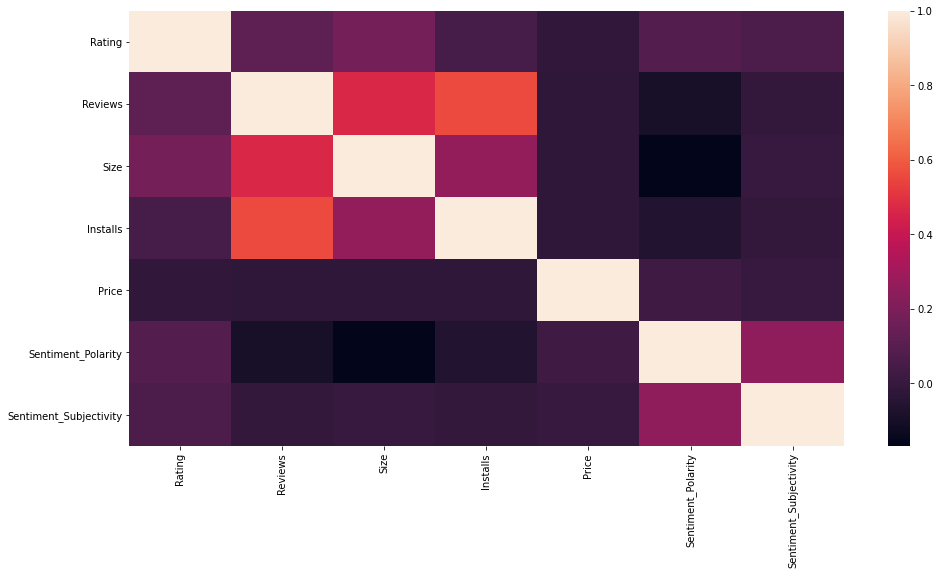

In [ ]:
plt.figure(figsize=(16,8))
corr= merged_PS_UR.corr()
sns.heatmap(corr)
plt.show()

In [ ]:
cleaned_PS.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.060899,0.064108,0.043974,-0.021372
Reviews,0.060899,1.000000,0.187898,0.605909,-0.008240
Size,0.064108,0.187898,1.000000,0.141310,-0.025668
Installs,0.043974,0.605909,0.141310,1.000000,-0.009884
Price,-0.021372,-0.008240,-0.025668,-0.009884,1.000000


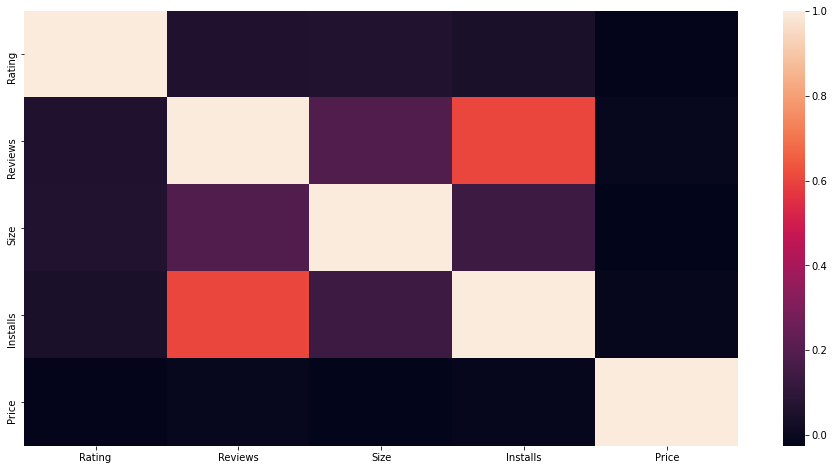

In [ ]:
plt.figure(figsize=(16,8))
corr= cleaned_PS.corr()
sns.heatmap(corr)
plt.show()

In [ ]:
new_UR.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261587
Sentiment_Subjectivity,0.261587,1.000000


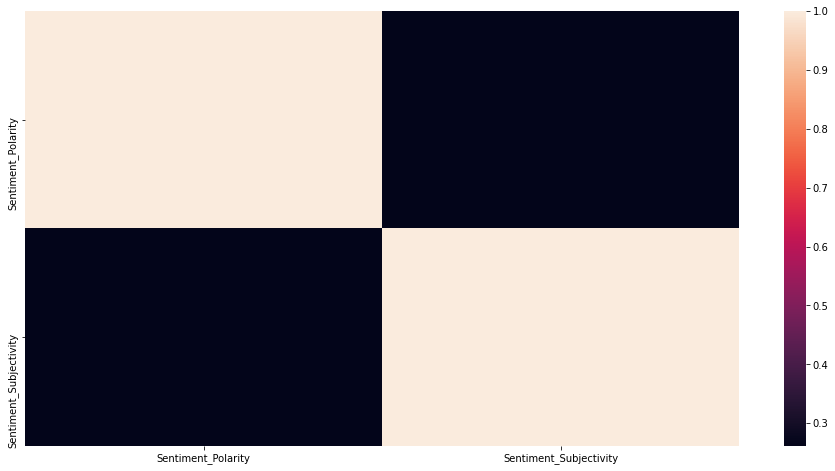

In [ ]:
plt.figure(figsize=(16,8))
corr= new_UR.corr()
sns.heatmap(corr)
plt.show()

**Note:** After Analysing Above HeatMaps correlation...we can infer that we dont have better correlations between the different columns.

## ***1. Top categories on Google Playstore?***

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
cleaned_PS.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1685
GAME                    916
TOOLS                   721
PRODUCTIVITY            304
FINANCE                 303
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 295
PHOTOGRAPHY             267
BUSINESS                264
SPORTS                  263
COMMUNICATION           257
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      206
SOCIAL                  204
TRAVEL_AND_LOCAL        187
SHOPPING                186
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           151
DATING                  135
MAPS_AND_NAVIGATION     120
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           96
AUTO_AND_VEHICLES        73
WEATHER                  73
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: App, dtype: int64

In [ ]:
y = cleaned_PS['Category'].value_counts().index
x = cleaned_PS['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

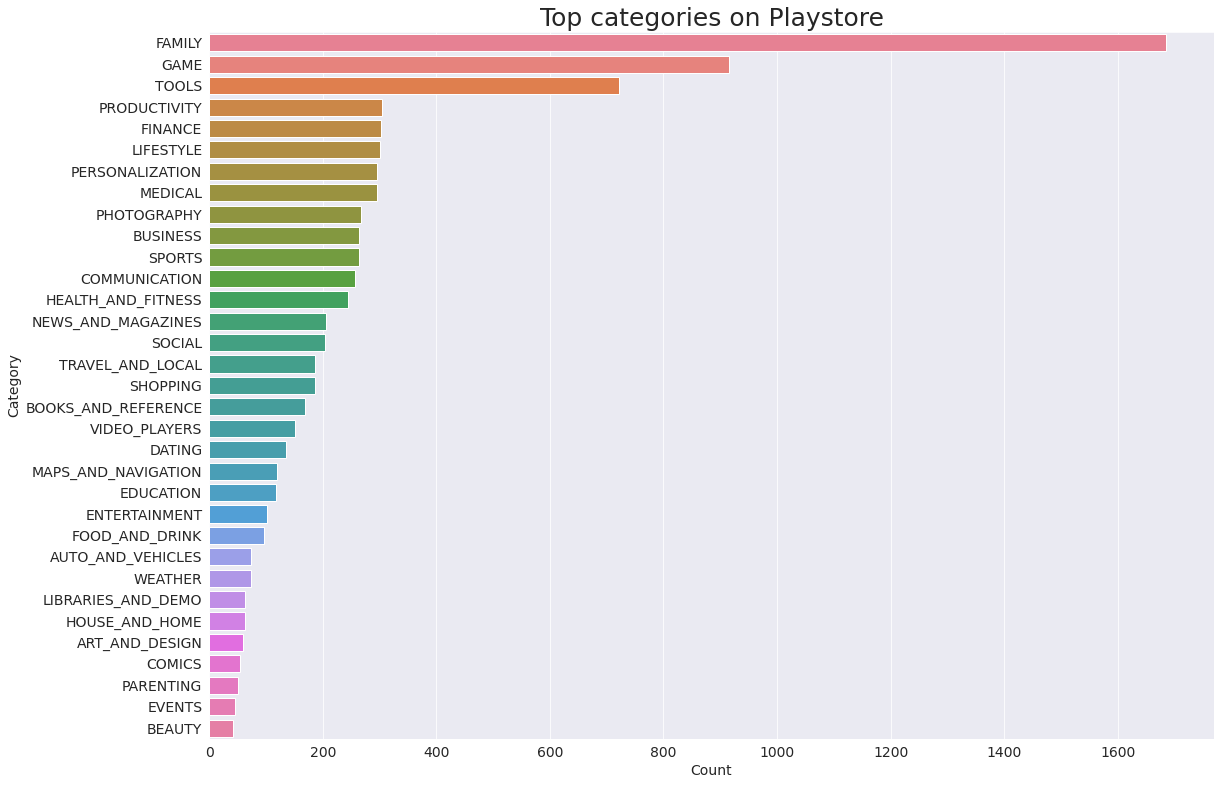

In [ ]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Playstore", fontsize = 25);

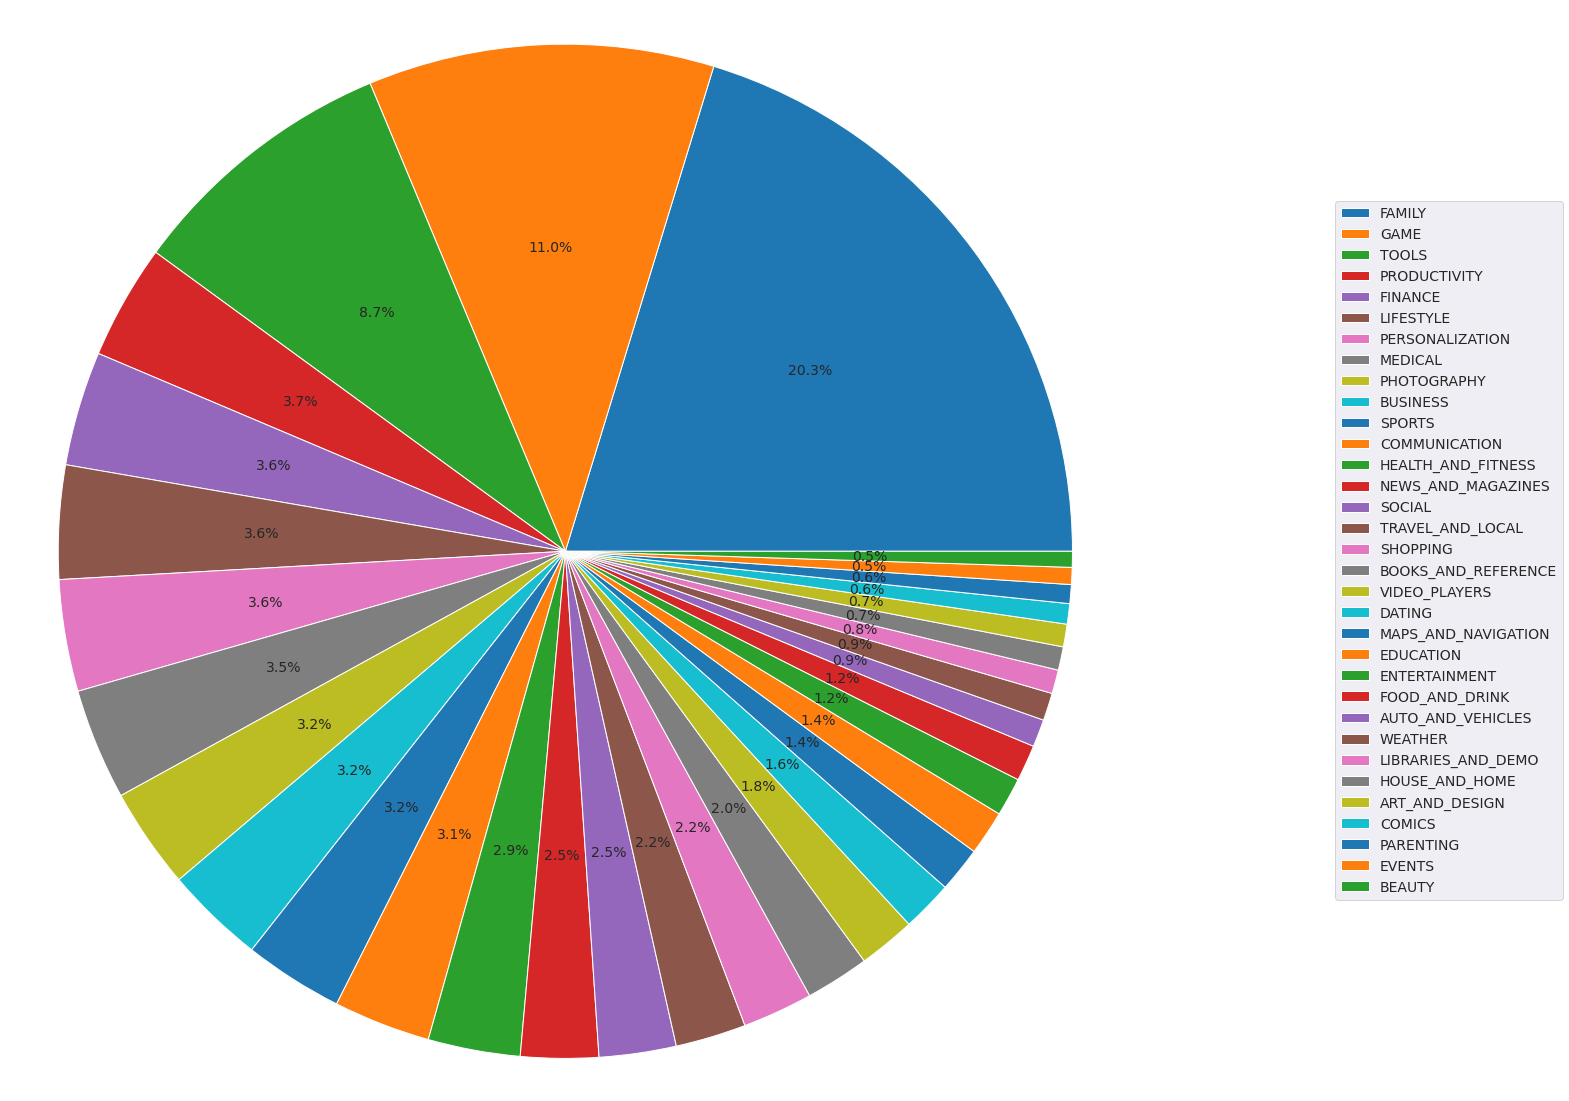

In [ ]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
number_of_apps = cleaned_PS["Category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

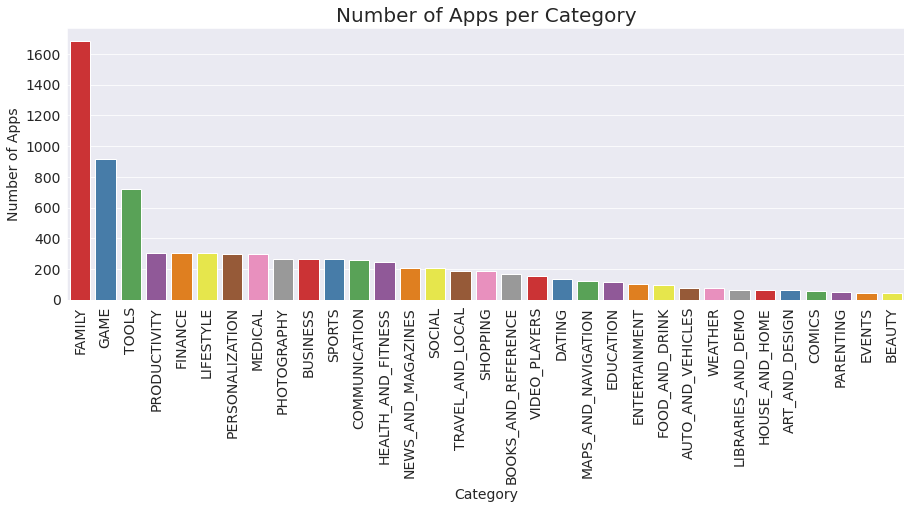

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Category', data=cleaned_PS, palette="Set1", order = cleaned_PS['Category'].value_counts().index)
plt.ylabel("Number of Apps")
plt.title("Number of Apps per Category", size=20)
for item in ax.get_xticklabels():
    item.set_rotation(90)

**Note:** So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore **most** of the apps are under **FAMILY** & **GAME** category and **least** are of **EVENTS** & **BEAUTY** Category

## ***2. Which category of Apps from the Content Rating column are found more on playstore ?***

In [ ]:
x2 = cleaned_PS['Content_Rating'].value_counts().index
y2 = cleaned_PS['Content_Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

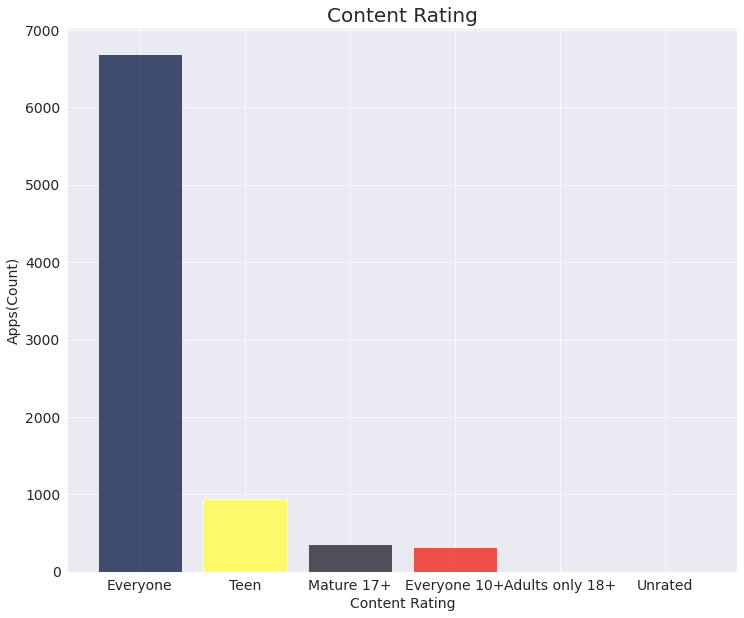

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

**Note:** From the above plot we can see that **Everyone** category has the **highest** number of apps.

## ***3. Distribution of the ratings of the apps?***

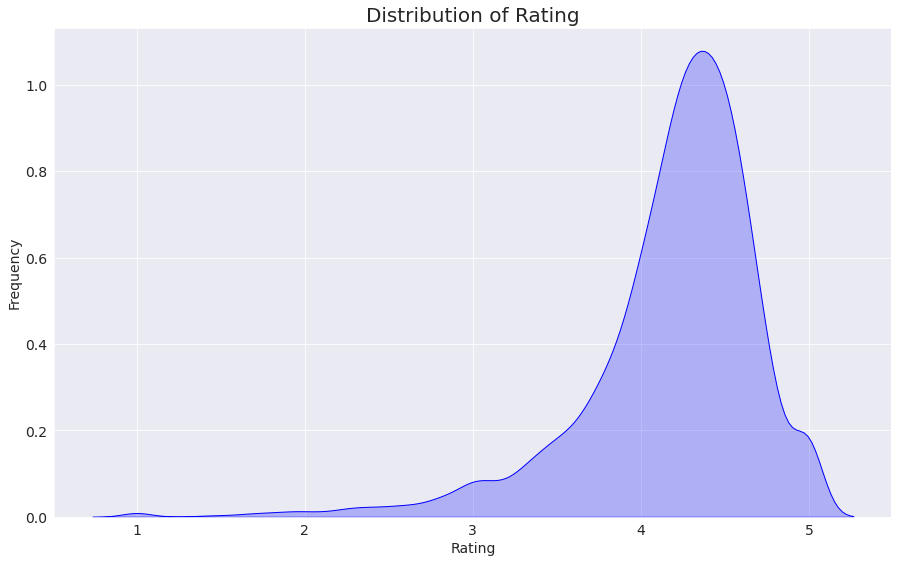

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(cleaned_PS.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

**Note:** From the above graph we can come to a conclusion that most of the apps in google playstore are rated in between **3.5 to 4.8**

## ***4. what portion of the apps in playstore are paid and free***

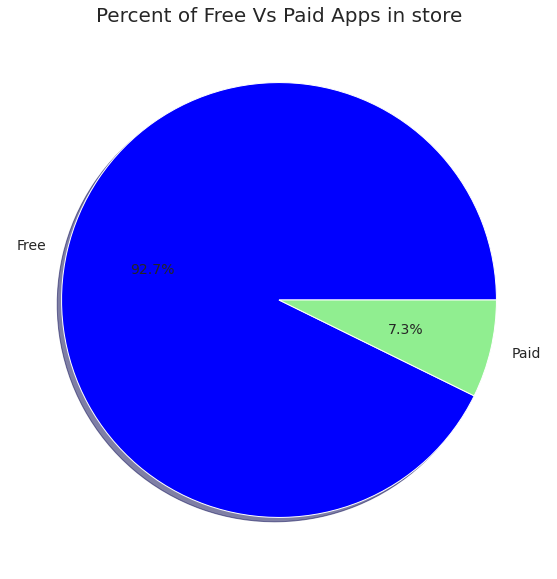

In [ ]:
plt.figure(figsize=(10,10))
labels = cleaned_PS['Type'].value_counts(sort = True).index
sizes = cleaned_PS['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode= None,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

**Note**: From the above graph we can see that **93%**(Approx.) of apps in google play store are **free** and **7%**(Approx.) are **paid**.

## ***5. Which category App's have most number of installs?***

In [ ]:
highest_Installs_df = cleaned_PS.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

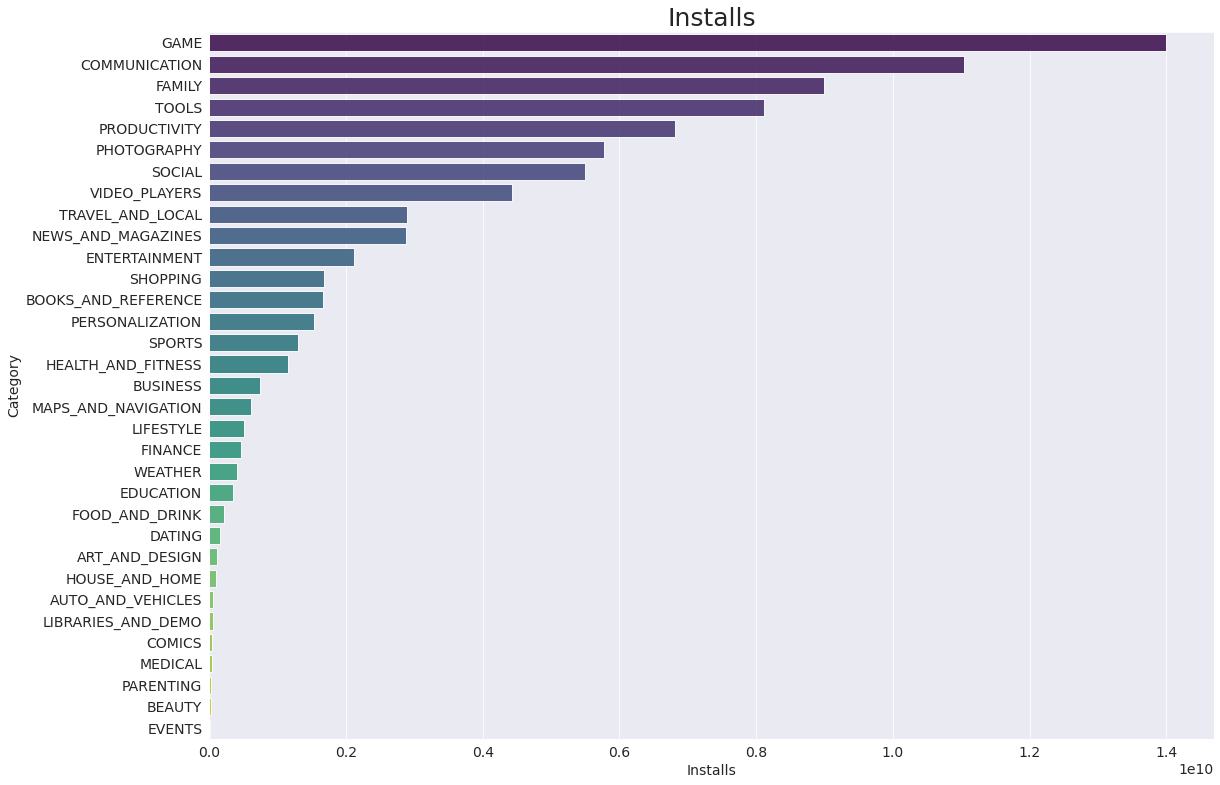

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

**Note:** From the above visualization, it can be interpreted that the top categories with **highest** installs are **Game, Communication,Family,Tools,Productivity.**

## ***6. What are the Top 10 installed apps in any category?***

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = cleaned_PS[cleaned_PS['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

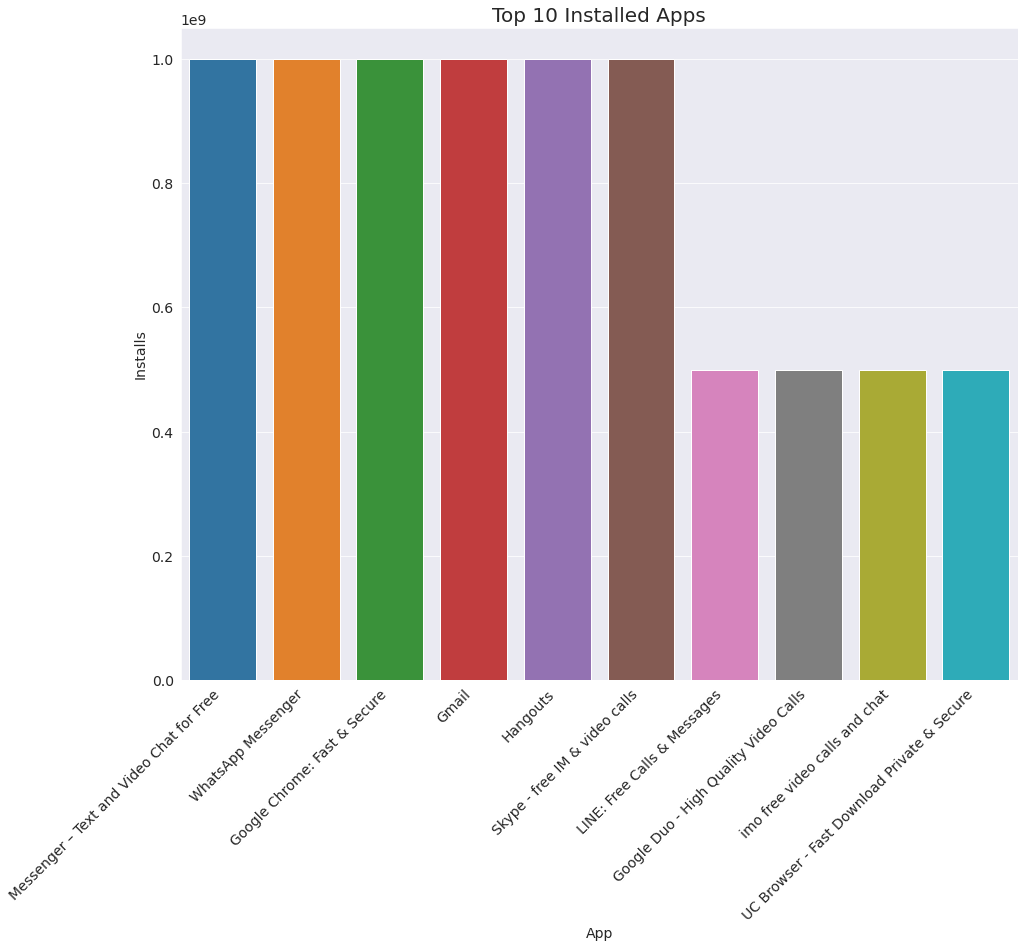

In [ ]:
findtop10incategory('Communication')

**Note:** From the above graph we can see that in the **Communication category Messenger- Text and Video Chat for Free, WhatsApp Messenger,Gmail has the highest installs.** In the same way we by passing different category names to the function, we can get the top 10 installed apps.

## ***7. Which are the top 10 expensive Apps in playstore?***

In [ ]:
top10PaidApps = cleaned_PS[cleaned_PS['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


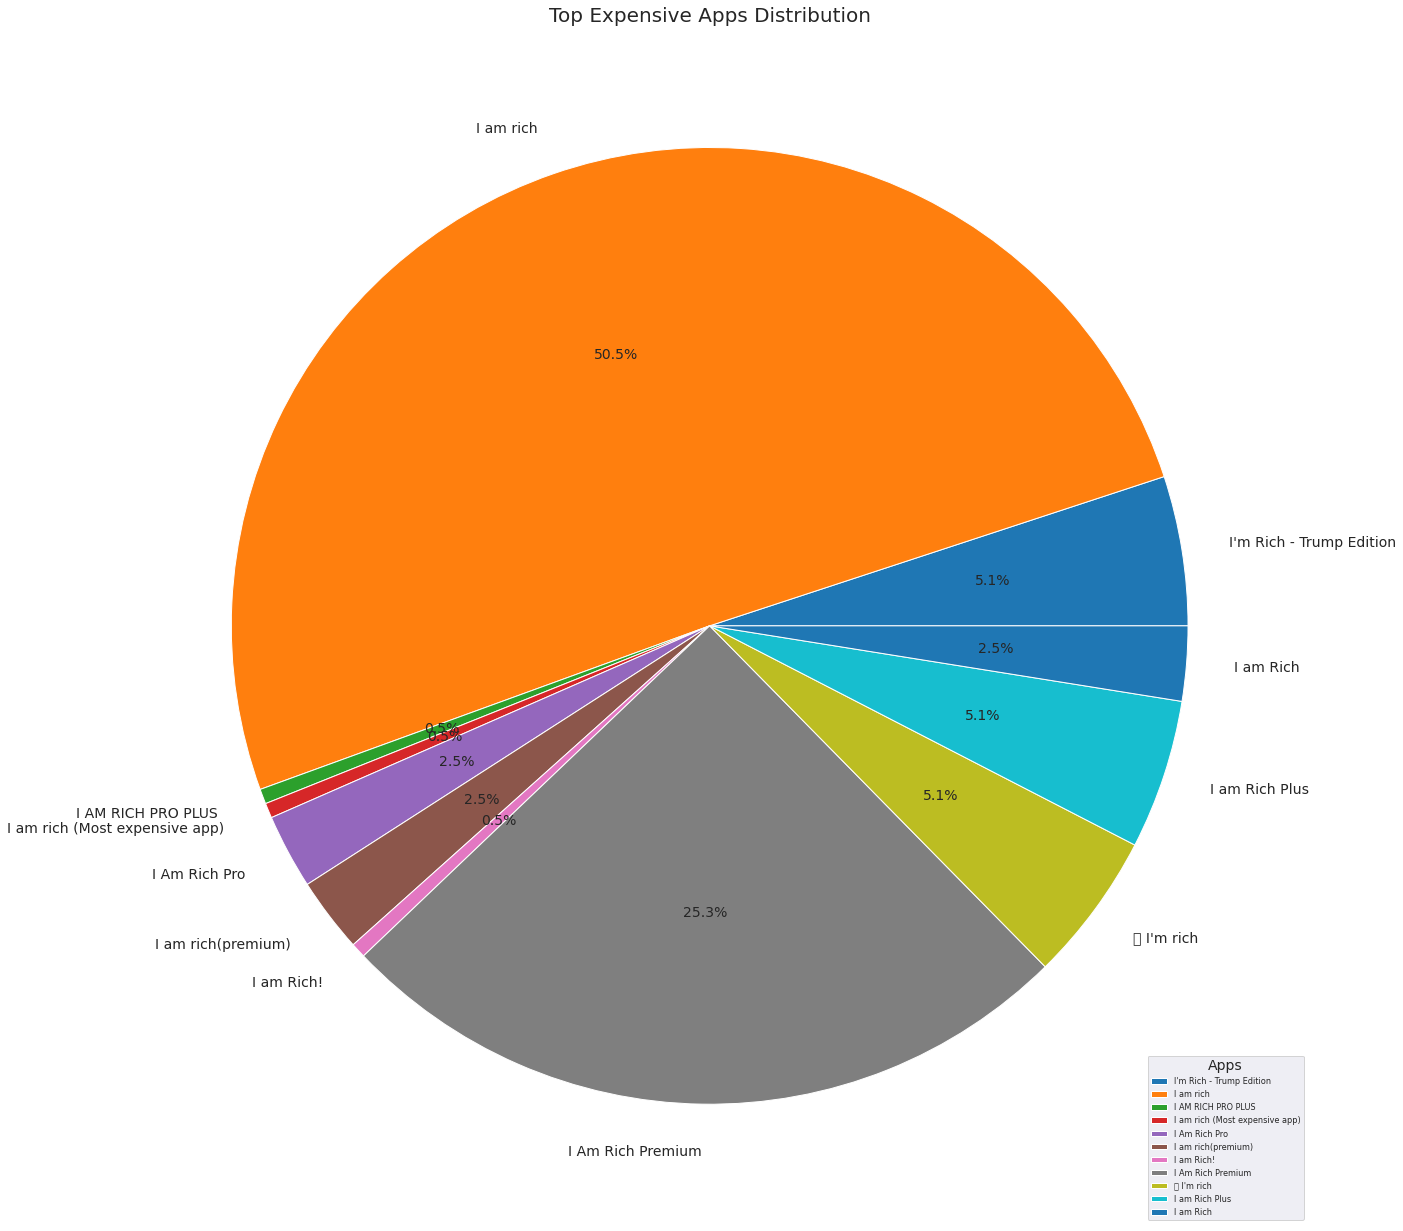

In [ ]:
plt.figure(figsize=(30,22));
plt.pie(top10PaidApps.Installs, explode=None, labels=top10PaidApps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

**Note:** From the above graph we can interprete that the **I am Rich** app is the **most expensive app** in the google playstore.




## 8. ***Highest and lowest rated Genres ***

In [ ]:
top_genres = cleaned_PS.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [ ]:
genres_installs = cleaned_PS.groupby(['Genres'])[['Installs']].sum()

In [ ]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')

In [ ]:
genres_ratings_df = cleaned_PS.groupby(['Genres'])[['Rating']].mean()

In [ ]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')

In [ ]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [ ]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


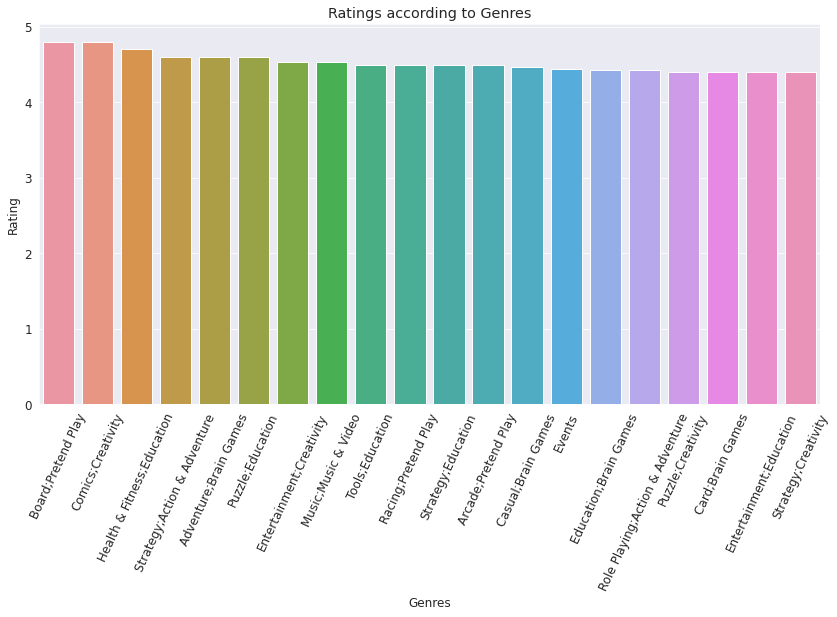

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

# 9. Android version based on each category***

Now I am going to group it to 1 till 8 version of android. Change the null value to 1.0.

In [ ]:
cleaned_PS['Android_Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
cleaned_PS['Android_Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
cleaned_PS['Android_Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
cleaned_PS['Android_Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
cleaned_PS['Android_Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
cleaned_PS['Android_Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
cleaned_PS['Android_Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
cleaned_PS['Android_Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
cleaned_PS['Android_Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
cleaned_PS['Android_Ver'].fillna('1.0', inplace=True)

Category        Android_Ver
ART_AND_DESIGN  4.0            48
                2.0             8
                3.0             2
                1.0             1
                5.0             1
                               ..
WEATHER         4.0            35
                1.0            23
                2.0            10
                5.0             4
                3.0             1
Name: Android_Ver, Length: 192, dtype: int64


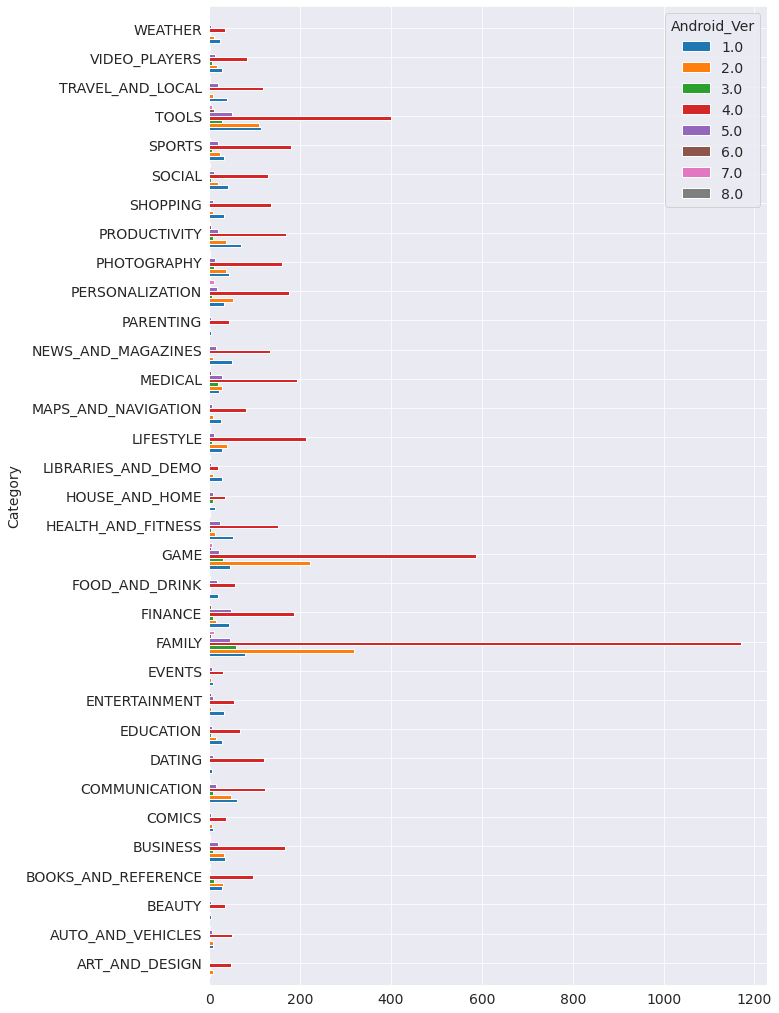

In [ ]:
print(cleaned_PS.groupby('Category')['Android_Ver'].value_counts())
Type_cat = cleaned_PS.groupby('Category')['Android_Ver'].value_counts().unstack().plot.barh(figsize=(10,18), width=1)
plt.show()

# 10. Rating,Reviewa,Price median value

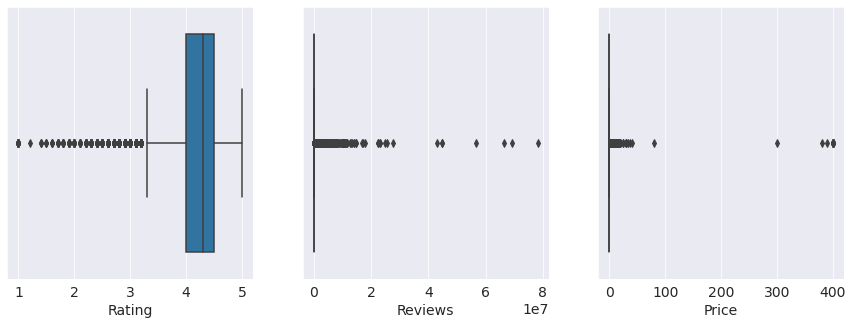

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.boxplot(x='Rating',data=cleaned_PS,ax=ax1)
sns.boxplot(x='Reviews',data=cleaned_PS,ax=ax2)
sns.boxplot(x='Price',data=cleaned_PS,ax=ax3)
f.set_size_inches(15, 5)

**Note:** 

1. We can see that most of the Ratings are between 4 and around 4.5 and 5.

2. As far as Reviews are concerned, for most of the Apps Reviews are not given.

3. Also for Price, most of the Apps are Free.

## 11. ***For each category of apss what is the median rating***
 


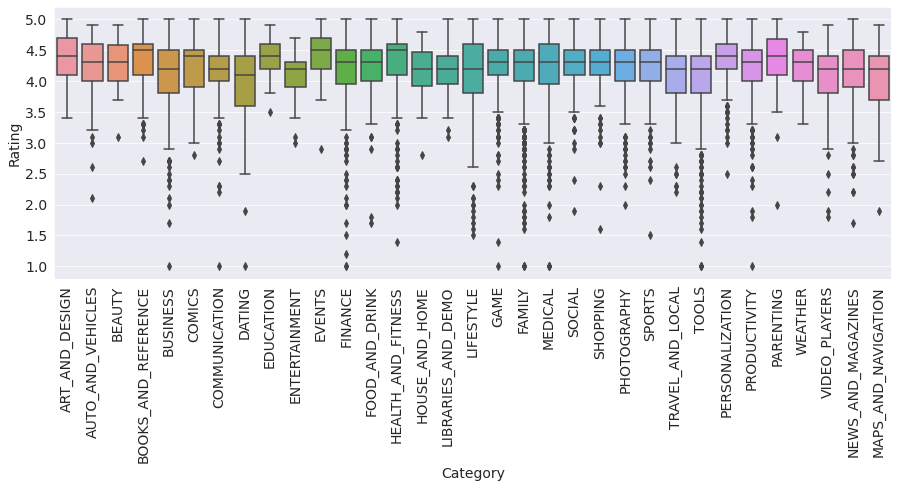

In [ ]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Category',y='Rating',data=cleaned_PS)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

#12. Well, it would be interesting to see if there is any relationship between Ratings vs Reviews. Does more number of reviews means more ratings?

From the below plot, we cannot say that there is a relation, it seems that irrespective of the Reviews, the ratings are majorly between 4 and 5, which we also noticed before

Also it is not correct to assume that rating and reviews have a relationship because reviews can be positive or negative and increase in the number of reviews does not show whether.  the Reviews are Positive or Negative.

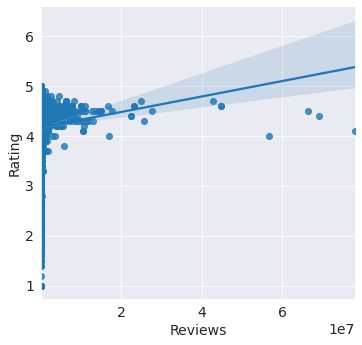

In [ ]:
g = sns.lmplot(x = 'Reviews',y='Rating',data=cleaned_PS)

# 13. What is the distribution of type of reviews in the dataset?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


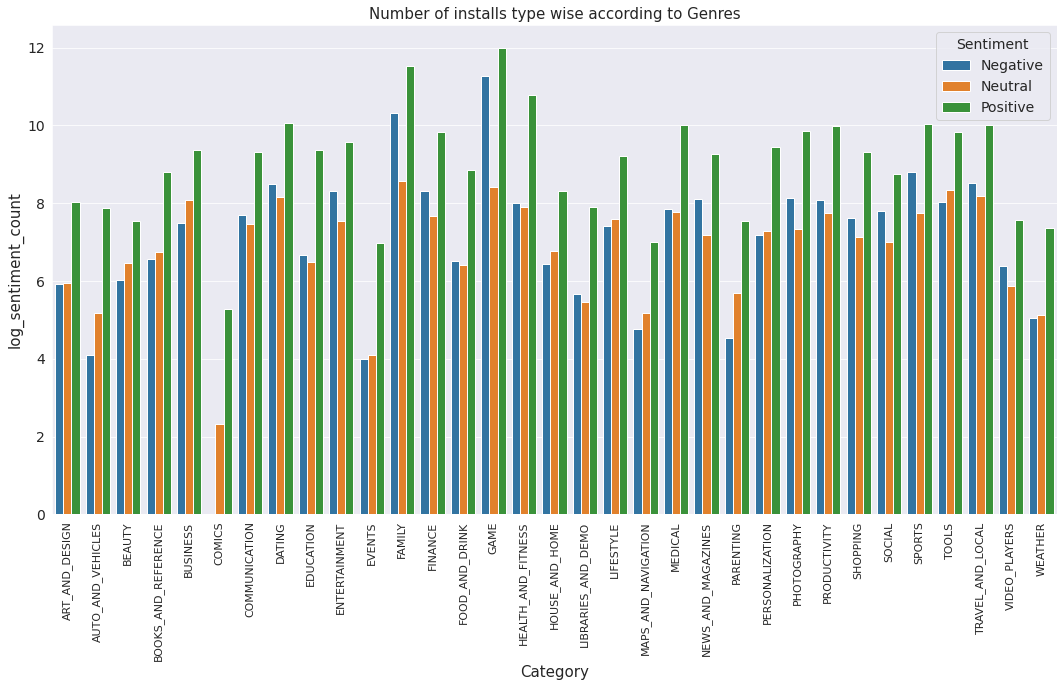

In [ ]:
category_sentiment = merged_PS_UR.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

#14. Histogram of Subjectivity

In [ ]:
merged_PS_UR.Sentiment_Subjectivity.value_counts()

0.000000    4318
1.000000    1757
0.500000    1701
0.600000    1221
0.750000    1167
            ... 
0.254286       1
0.371429       1
0.335119       1
0.611905       1
0.491667       1
Name: Sentiment_Subjectivity, Length: 4434, dtype: int64

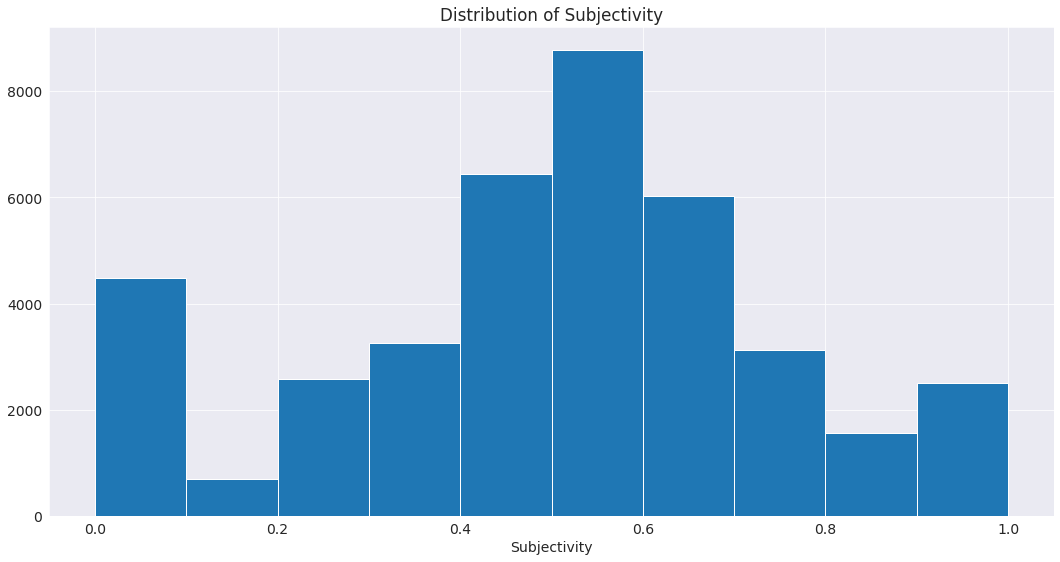

In [ ]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_PS_UR[merged_PS_UR['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

0 - objective(fact) 
1 - subjective(opinion)

It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

# 15. Is sentiment_subjectivity proportional to sentiment_polarity?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


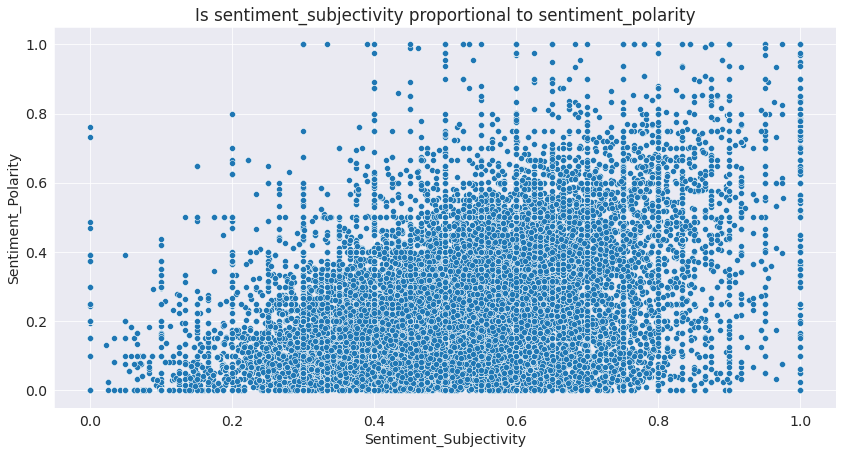

In [ ]:
sentimet_subjectivity_polarity = merged_PS_UR.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})
merged_PS_UR['Sentiment_Subjectivity'] = merged_PS_UR['Sentiment_Subjectivity'].abs()
merged_PS_UR['Sentiment_Polarity'] = merged_PS_UR['Sentiment_Polarity'].abs()
plt.figure(figsize=(14,7))
sns.scatterplot(merged_PS_UR['Sentiment_Subjectivity'], merged_PS_UR['Sentiment_Polarity'])
plt.title("Is sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of cases, it shows a proportional behavior, when variance is too high or low.

# 16. Percentage of Review Sentiments

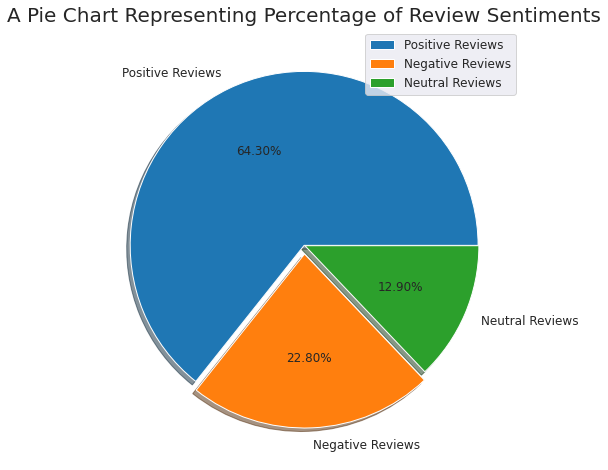

In [ ]:
counts = list(merged_PS_UR['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

## 17. ***What is the count of applications in each category differentiated by their type?***

In [ ]:
app_count = cleaned_PS.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [ ]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

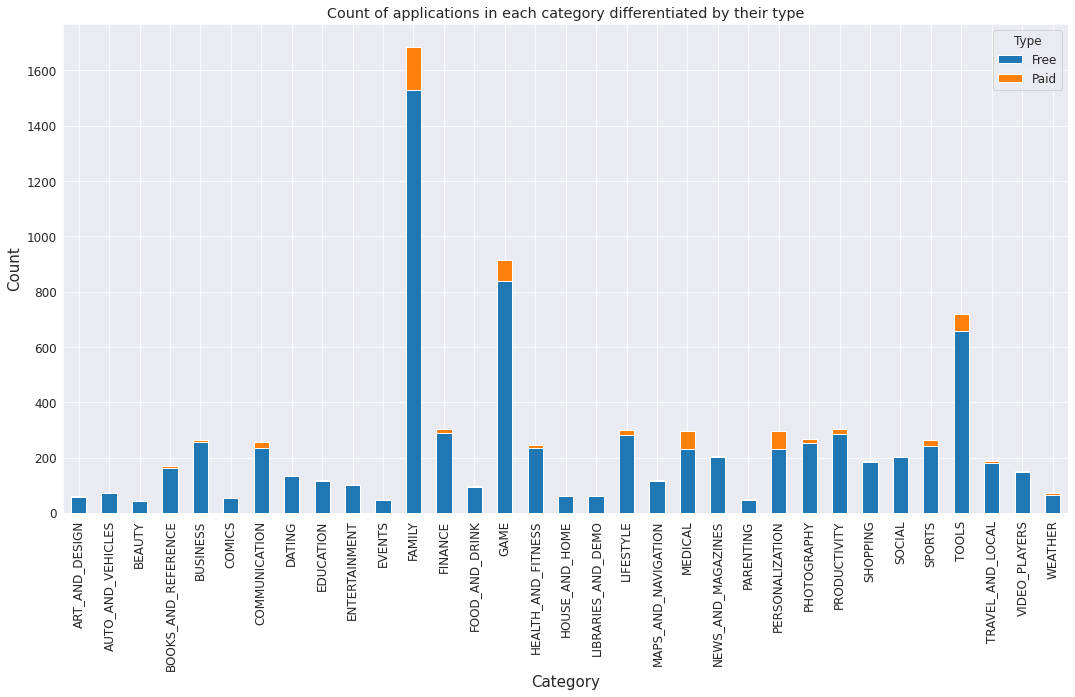

In [ ]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

# 18. Does the last update date has an effect on rating?

In [ ]:
print(cleaned_PS['Last_Updated'].head())
#fetch update year from date
cleaned_PS["Update_year"] = cleaned_PS["Last_Updated"].apply(lambda x: x.strftime('%Y')).astype('int64') 

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]


In [ ]:
cleaned_PS.groupby("Update_year")["Rating"].count()

Update_year
2010       1
2011      15
2012      21
2013      91
2014     184
2015     382
2016     629
2017    1433
2018    5556
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Update Year VS Rating')

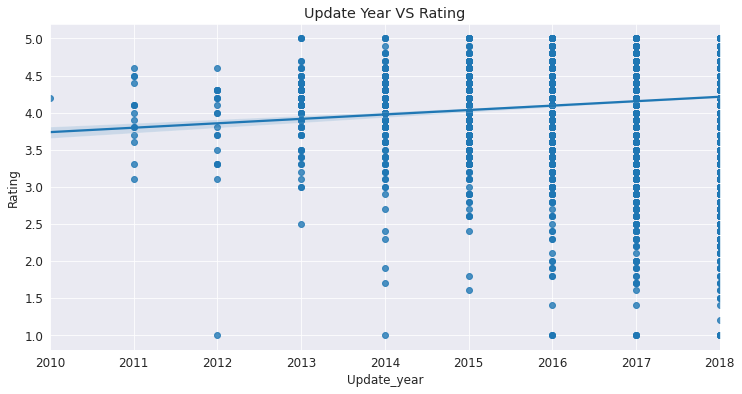

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x="Update_year", y="Rating", data=cleaned_PS)
plt.title("Update Year VS Rating")

**Note:** From above graph, we can conclude, the app gets more recent updates chances of getting a higher rating increases.

# 19. Do price of the app effects the rating?

Text(0.5, 1.0, 'Price VS Rating')

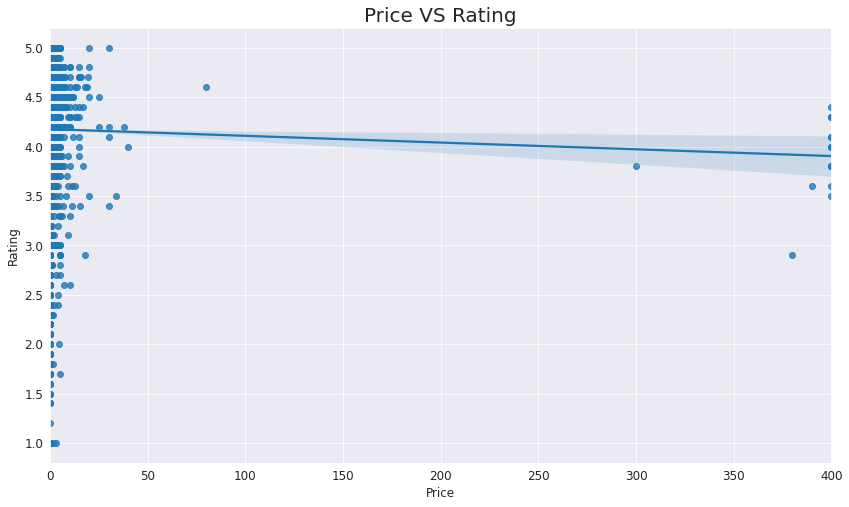

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Price", y="Rating", data=cleaned_PS)
plt.title("Price VS Rating", size=20)

**Note:** Yes, as the price increases ratings received seems to decrease even below the average rating in the appstore.

## 20.*** How many apps were installed according to its type?***

In [ ]:
cleaned_PS['Gaming Category App'] = cleaned_PS['Category']=='GAME'

In [ ]:
categoty_type_installs = cleaned_PS.groupby(['Category','Type'])[['Installs']].sum().reset_index()


In [ ]:
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


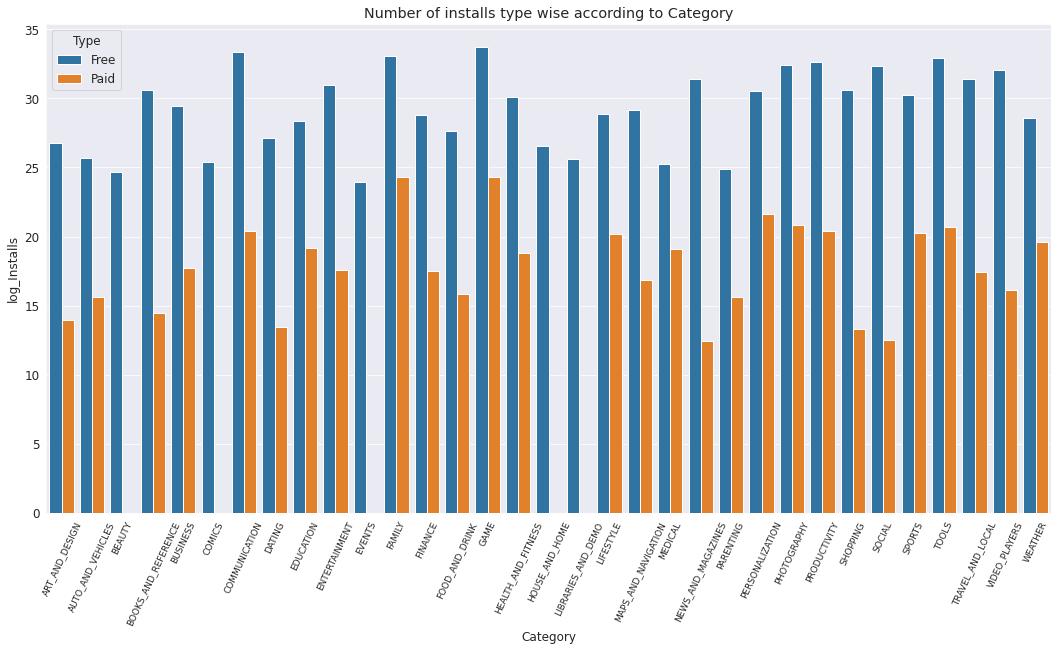

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()